In [1]:
import analyticslib 
from analyticslib import DataSet

# Dataset Description

#### This dataset consists of a subset of Clinvar database accepted submissions, where more than one submission exists for the same variant. This subset includes extra features generated by Ensembl VEP (Variant Effect Predictor).

The idea of this work is to generate a pathogenicity predictor based con ClinVar record. The provided sample consists of 65K ClinVar annotated records, but this could eventually be extended to millions of records. Because of Ensembl VEP processing time, it is out of the scope of this project to generate annotations for such amount of records, so we will focus on the 65K sample.


#### Source: https://www.kaggle.com/kevinarvai/clinvar-conflicting

<table>
    <tr>
        <th>Attribute</th>
        <th>Description</th>
    </tr>    
<tr><td>CHROM</td><td>Chromosome the variant is located on</td></tr>
<tr><td>POS</td><td>Position on the chromosome the variant is located on.</td></tr>
<tr><td>REF</td><td>Reference Allele</td></tr>
<tr><td>ALT</td><td>Alternaete Allele</td></tr>
<tr><td>AF_ESP</td><td>Allele frequencies from GO-ESP</td></tr>
<tr><td>AF_EXAC</td><td>Allele frequencies from ExAC</td></tr>
<tr><td>AF_TGP</td><td>Allele frequencies from the 1000 genomes project</td></tr>
<tr><td>CLNDISDB</td><td>Tag-value pairs of disease database name and identifier, e.g. OMIM:NNNNNN</td></tr>
<tr><td>CLNDISDBINCLF</td><td>or included Variant: Tag-value pairs of disease database name and identifier, e.g. OMIM:NNNNNN</td></tr>
<tr><td>CLNDN</td><td>ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB</td></tr>
<tr><td>CLNDNINCL</td><td>For included Variant : ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB</td></tr>
<tr><td>CLNHGVS</td><td>Top-level (primary assembly, alt, or patch) HGVS expression.</td></tr>
<tr><td>CLNSIGINCL</td><td>Clinical significance for a haplotype or genotype that includes this variant. Reported as pairs of VariationID:clinical significance.</td></tr>
<tr><td>CLNVC</td><td>Variant Type</td></tr>
<tr><td>CLNVI</td><td>the variant's clinical sources reported as tag-value pairs of database and variant identifier</td></tr>
<tr><td>MC</td><td>comma separated list of molecular consequence in the form of Sequence Ontology ID|molecular_consequence</td></tr>
<tr><td>ORIGIN</td><td>Allele origin. One or more of the following values may be added: 0 - unknown; 1 - germline; 2 - somatic; 4 - inherited; 8 - paternal; 16 - maternal; 32 - de-novo; 64 - biparental; 128 - uniparental; 256 - not-tested; 512 - tested-inconclusive; 1073741824 - other
<tr><td>SSR</td><td>Variant Suspect Reason Codes. One or more of the following values may be added: 0 - unspecified, 1 - Paralog, 2 - byEST, 4 - oldAlign, 8 - Para_EST, 16 - 1kg_failed, 1024 - other
<tr><td>CLASS</td><td>The binary representation of the target class. 0 represents no conflicting submissions and 1 represents conflicting submissions.</td></tr>
<tr><td>Allele</td><td>the variant allele used to calculate the consequence</td></tr>
<tr><td>Consequence</td><td>Type of consequence: https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html#consequences</td></tr>
<tr><td>IMPACT</td><td>the impact modifier for the consequence type</td></tr>
<tr><td>SYMBOL</td><td>Gene Name</td></tr>
<tr><td>Feature_type</td><td>type of feature. Currently one of Transcript, RegulatoryFeature, MotifFeature.</td></tr>
<tr><td>Feature</td><td>Ensembl stable ID of feature</td></tr>
<tr><td>BIOTYPE</td><td>Biotype of transcript or regulatory feature</td></tr>
<tr><td>EXON</td><td>the exon number (out of total number)</td></tr>
<tr><td>INTRON</td><td>the intron number (out of total number)</td></tr>
<tr><td>cDNA_position</td><td>relative position of base pair in cDNA sequence</td></tr>
<tr><td>CDS_positionr</td><td>elative position of base pair in coding sequence</td></tr>
<tr><td>Protein_position</td><td>relative position of amino acid in protein</td></tr>
<tr><td>Amino_acids</td><td>only given if the variant affects the protein-coding sequence</td></tr>
<tr><td>Codons</td><td>the alternative codons with the variant base in upper case</td></tr>
<tr><td>DISTANCE</td><td>Shortest distance from variant to transcript</td></tr>
<tr><td>STRAND</td><td>defined as + (forward) or - (reverse).</td></tr>
<tr><td>BAM_EDIT</td><td>Indicates success or failure of edit using BAM file</td></tr>
<tr><td>SIFT</td><td>the SIFT prediction and/or score, with both given as prediction(score)</td></tr>
<tr><td>PolyPhen</td><td>the PolyPhen prediction and/or score</td></tr>
<tr><td>MOTIF_NAME</td><td>the source and identifier of a transcription factor binding profile aligned at this position</td></tr>
<tr><td>MOTIF_POS</td><td>The relative position of the variation in the aligned TFBP</td></tr>
<tr><td>HIGH_INF_POS</td><td>a flag indicating if the variant falls in a high information position of a transcription factor binding profile (TFBP)</td></tr>
<tr><td>MOTIF_SCORE_CHANGE</td><td>The difference in motif score of the reference and variant sequences for the TFBP</td></tr>
<tr><td>LoFtool</td><td>Loss of Function tolerance score for loss of function variants: https://github.com/konradjk/loftee</td></tr>
<tr><td>CADD_PHRED</td><td>Phred-scaled CADD score.</td></tr>
<tr><td>CADD_RAW</td><td>Score of the deleteriousness of variants: http://cadd.gs.washington.edu/</td></tr>
<tr><td>BLOSUM62</td><td>See: http://rosalind.info/glossary/blosum62/</td></tr>
</table>
    

# Load Data

In [2]:
dataMain = DataSet(spark_context=sc, filename="clinvar_conflicting.csv", sampling_mode="SAMPLE", sampling_parameter=0.2)


loading COS csv


In [3]:
dataMain.compute_stats()

In [4]:
dataMain.dataset.printSchema()

root
 |-- CHROM: string (nullable = true)
 |-- POS: integer (nullable = true)
 |-- REF: string (nullable = true)
 |-- ALT: string (nullable = true)
 |-- AF_ESP: double (nullable = true)
 |-- AF_EXAC: double (nullable = true)
 |-- AF_TGP: double (nullable = true)
 |-- CLNDISDB: string (nullable = true)
 |-- CLNDISDBINCL: string (nullable = true)
 |-- CLNDN: string (nullable = true)
 |-- CLNDNINCL: string (nullable = true)
 |-- CLNHGVS: string (nullable = true)
 |-- CLNSIGINCL: string (nullable = true)
 |-- CLNVC: string (nullable = true)
 |-- CLNVI: string (nullable = true)
 |-- MC: string (nullable = true)
 |-- ORIGIN: integer (nullable = true)
 |-- SSR: integer (nullable = true)
 |-- CLASS: integer (nullable = true)
 |-- Allele: string (nullable = true)
 |-- Consequence: string (nullable = true)
 |-- IMPACT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- Feature_type: string (nullable = true)
 |-- Feature: string (nullable = true)
 |-- BIOTYPE: string (nullable = 

In [5]:
pandasData = dataMain.dataset.limit(10).toPandas()
pandasData.iloc[:10, :15]


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI
0,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,None,not_specified,None,NC_000001.10:g.976059C>T,None,single_nucleotide_variant,None
1,1,976563,C,T,0.0000,0.00135,0.0098,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.976563C>T,None,single_nucleotide_variant,None
2,1,978668,G,A,0.0048,0.00327,0.0016,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.978668G>A,None,single_nucleotide_variant,None
3,1,980773,C,T,0.0106,0.00360,0.0110,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.980773C>T,None,single_nucleotide_variant,None
4,1,982722,A,G,0.0054,0.01432,0.0140,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.982722A>G,None,single_nucleotide_variant,None
5,1,982783,T,C,0.0080,0.00511,0.0084,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.982783T>C,None,single_nucleotide_variant,None
6,1,982844,G,C,0.0541,0.05769,0.0387,MedGen:CN169374,None,not_specified,None,NC_000001.10:g.982844G>C,None,single_nucleotide_variant,None
7,1,983243,C,T,0.0021,0.00280,0.0018,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.983243C>T,None,single_nucleotide_variant,None
8,1,984426,C,T,0.0026,0.00153,0.0048,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.984426C>T,None,single_nucleotide_variant,None
9,1,984669,C,T,0.0043,0.00412,0.0004,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",None,"Myasthenic_syndrome,_congenital,_8|not_specified",None,NC_000001.10:g.984669C>T,None,single_nucleotide_variant,None


In [6]:
pandasData.iloc[:10, 15:35]

,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND
0,SO:0001819|synonymous_variant,1,None,1,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,4/39,None,576,526,176,L,Ctg/Ttg,None,1
1,SO:0001819|synonymous_variant,1,None,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,5/39,None,788,738,246,D,gaC/gaT,None,1
2,SO:0001819|synonymous_variant,1,None,0,A,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,8/39,None,1484,1434,478,T,acG/acA,None,1
3,SO:0001819|synonymous_variant,1,None,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,14/39,None,2456,2406,802,G,ggC/ggT,None,1
4,SO:0001583|missense_variant,1,None,0,G,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,20/39,None,3454,3404,1135,Q/R,cAg/cGg,None,1
5,SO:0001819|synonymous_variant,1,None,0,C,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,20/39,None,3515,3465,1155,A,gcT/gcC,None,1
6,SO:0001627|intron_variant,1,None,0,C,intron_variant,MODIFIER,AGRN,Transcript,NM_001305275.1,protein_coding,None,20/38,None,None,None,None,None,None,1
7,SO:0001583|missense_variant,1,None,0,T,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,22/39,None,3769,3719,1240,P/L,cCg/cTg,None,1
8,SO:0001583|missense_variant,1,None,0,T,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,24/39,None,4335,4285,1429,R/C,Cgc/Tgc,None,1
9,SO:0001583|missense_variant,1,None,0,T,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,25/39,None,4402,4352,1451,P/L,cCg/cTg,None,1


In [7]:
pandasData.iloc[:10, 35:46]

,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,None,None,None,None,None,None,None,0.421,17.740,2.234711,NaN
1,None,None,None,None,None,None,None,0.421,9.846,0.862789,NaN
2,None,None,None,None,None,None,None,0.421,6.151,0.348279,NaN
3,None,None,None,None,None,None,None,0.421,11.400,1.134618,NaN
4,None,None,None,None,None,None,None,0.421,23.700,4.049781,1.0
5,None,None,None,None,None,None,None,0.421,0.189,-0.526476,NaN
6,None,None,None,None,None,None,None,0.421,0.164,-0.551016,NaN
7,None,None,None,None,None,None,None,0.421,28.800,6.235648,-3.0
8,None,None,None,None,None,None,None,0.421,24.000,4.311740,-3.0
9,None,None,None,None,None,None,None,0.421,6.907,0.434292,-3.0


# Data Shape: Distribution Visualization

In [8]:
len(dataMain.dataset.columns)

46

Col: CHROM
(categoric)


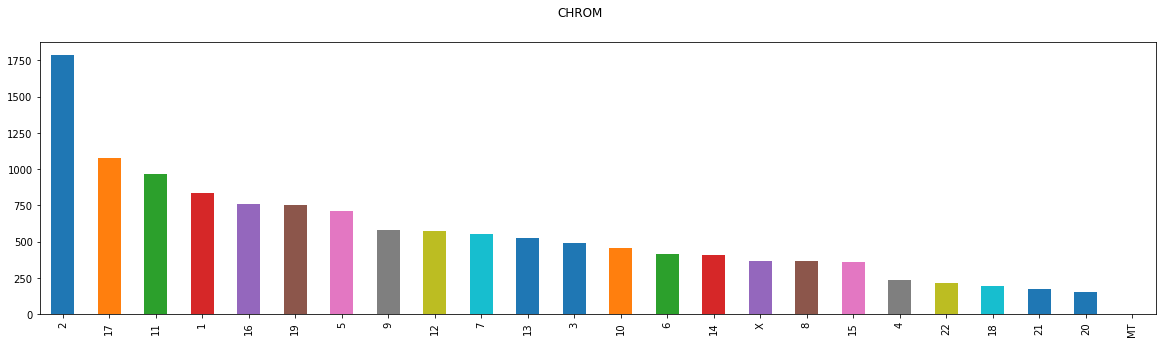

Col: POS
(numeric)


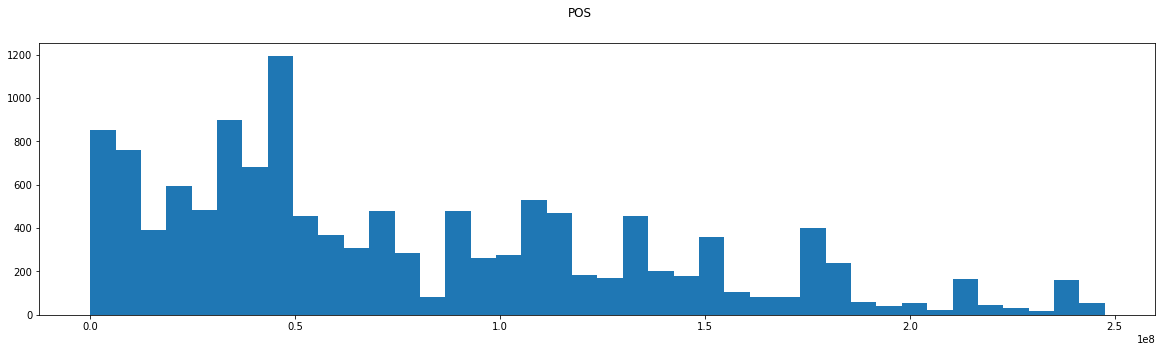

Col: REF
(categoric)


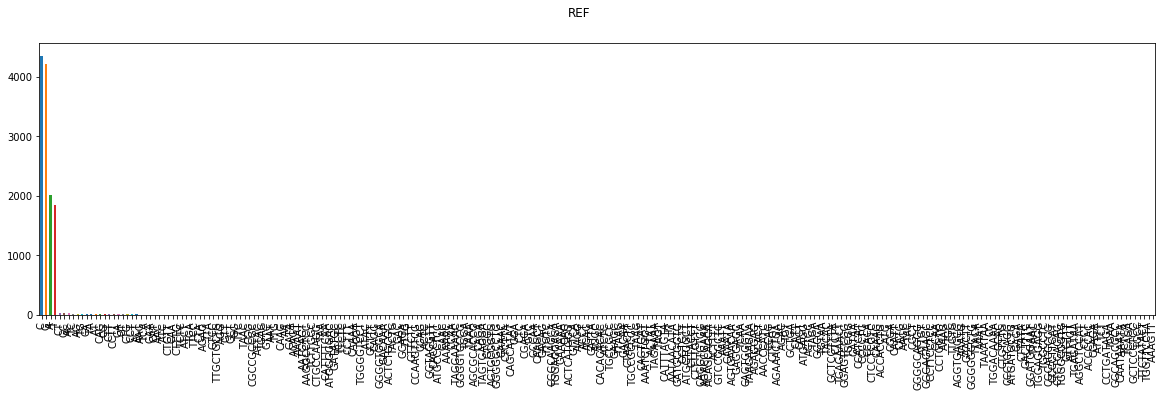

Col: ALT
(categoric)


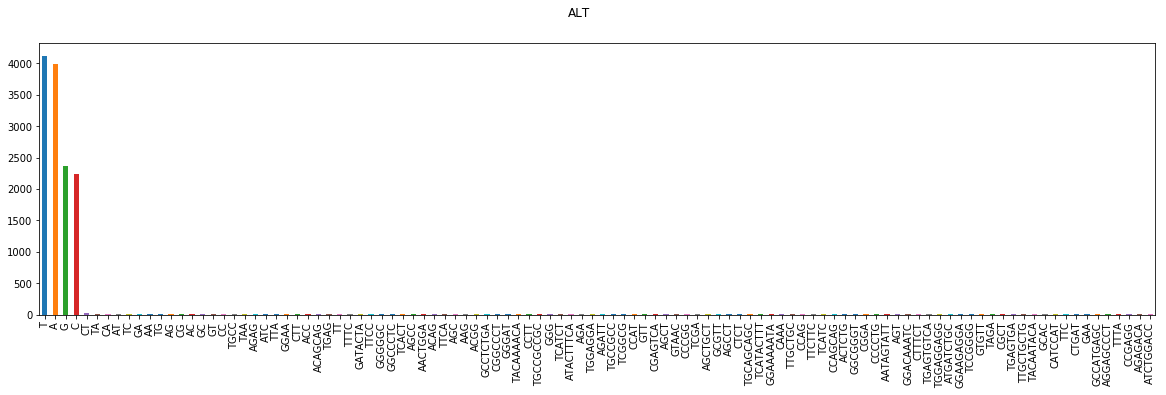

Col: AF_ESP
(numeric)


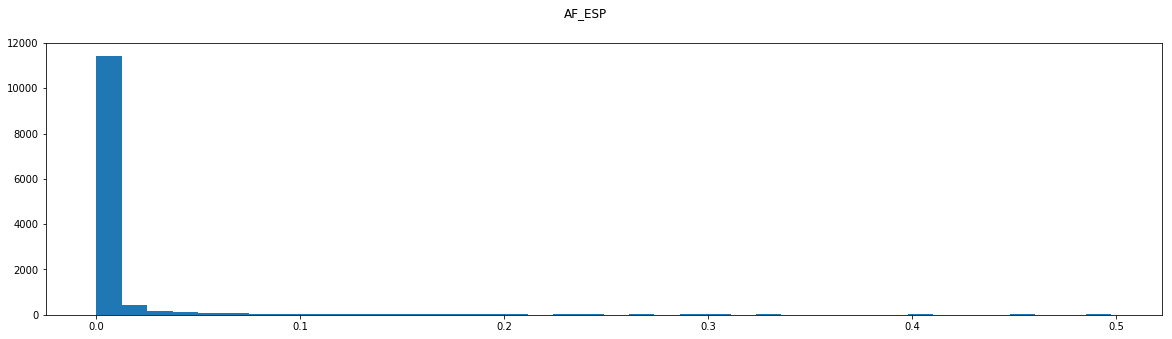

Col: AF_EXAC
(numeric)


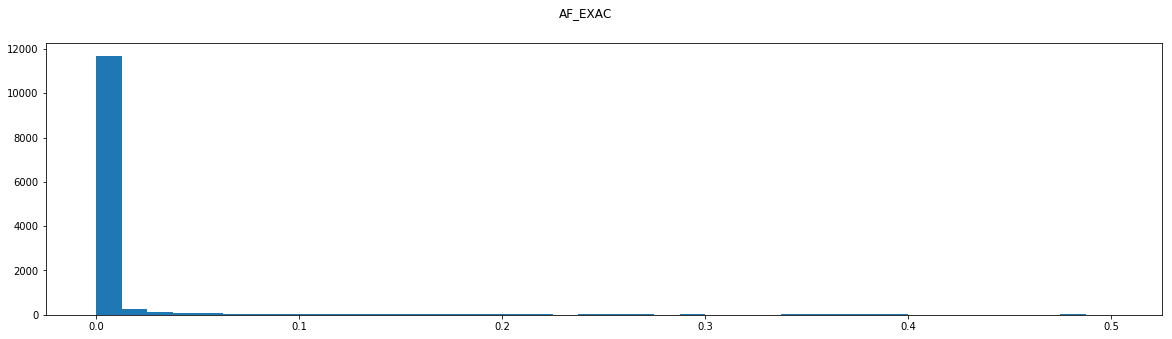

Col: AF_TGP
(numeric)


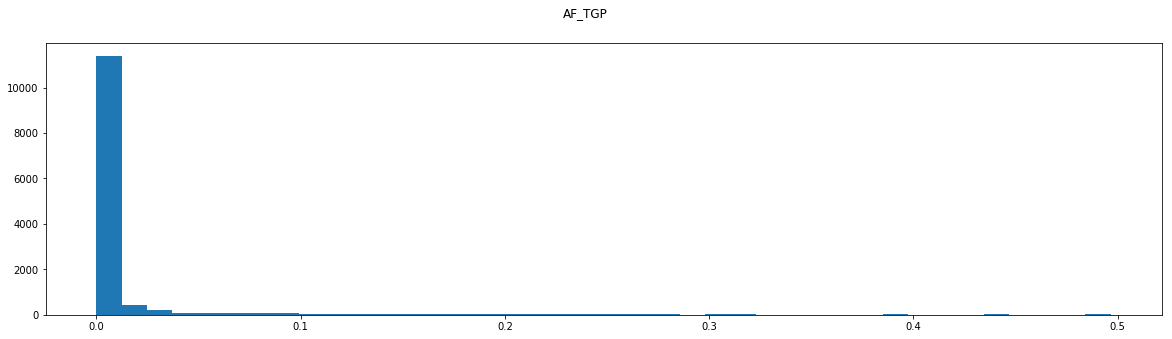

Col: CLNDISDB
(categoric)


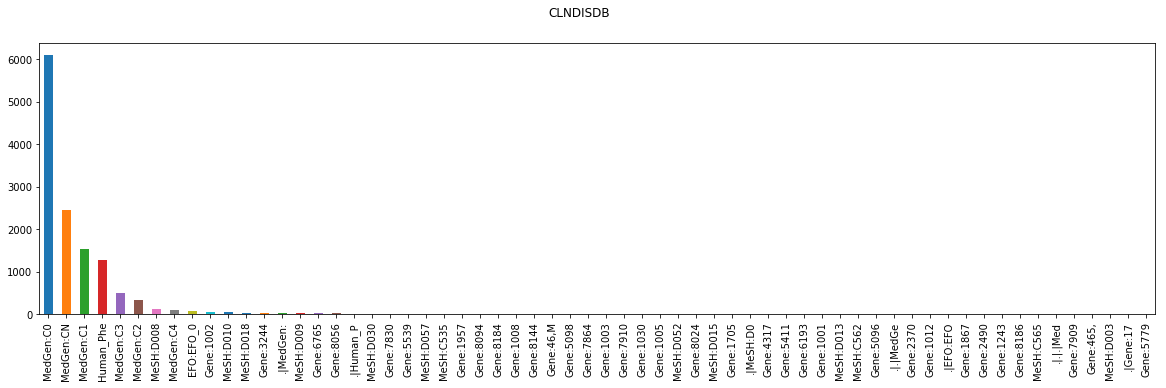

Col: CLNDISDBINCL
(categoric)


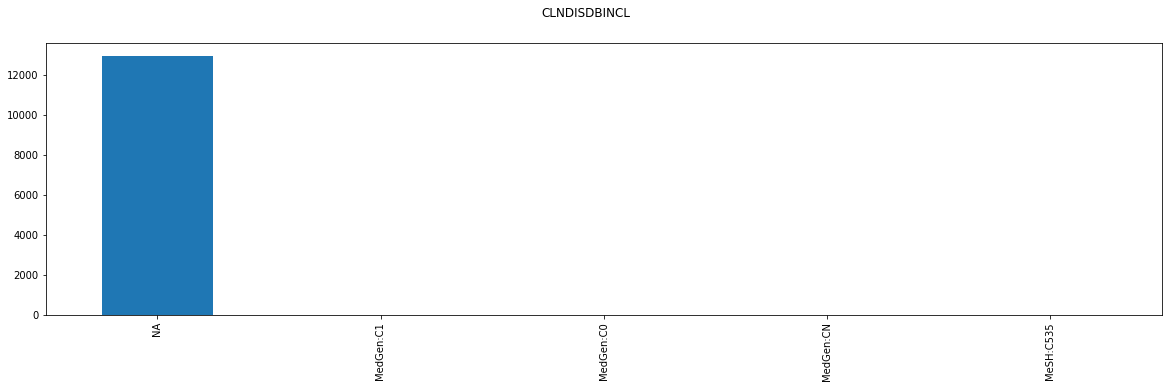

Col: CLNDN
(categoric)


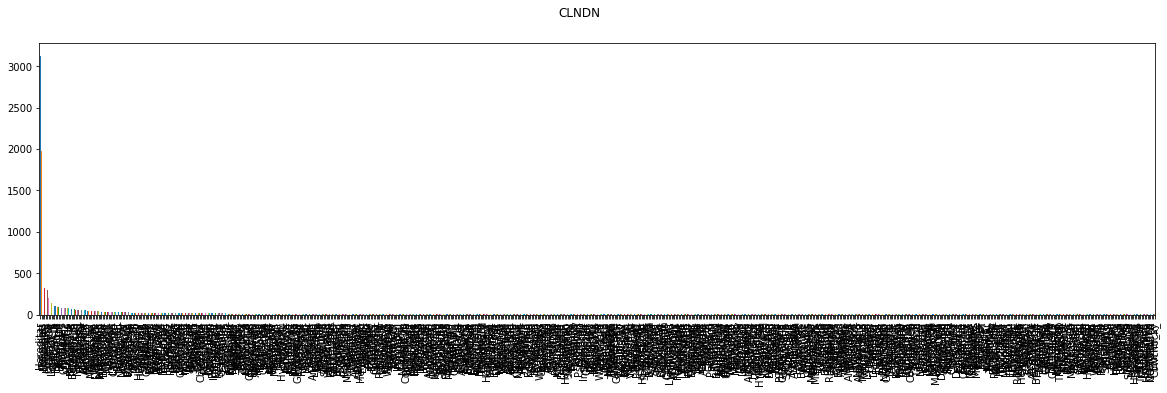

Col: CLNDNINCL
(categoric)


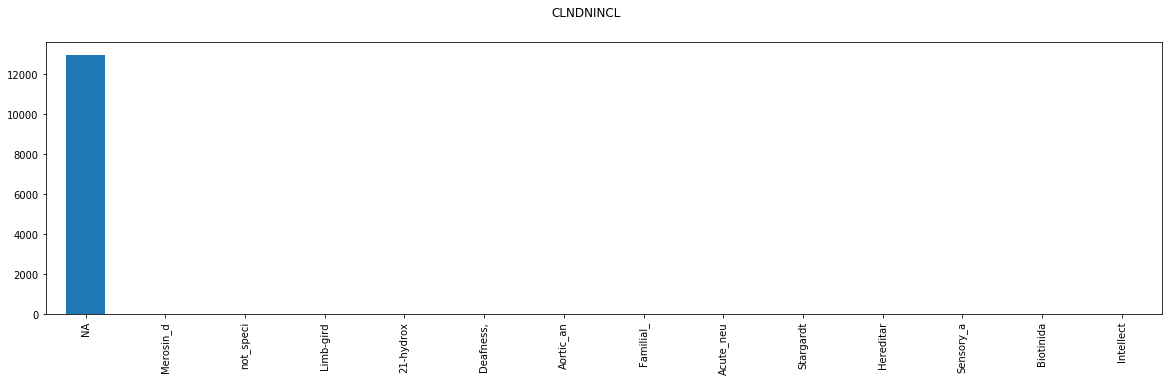

Col: CLNHGVS
(categoric)


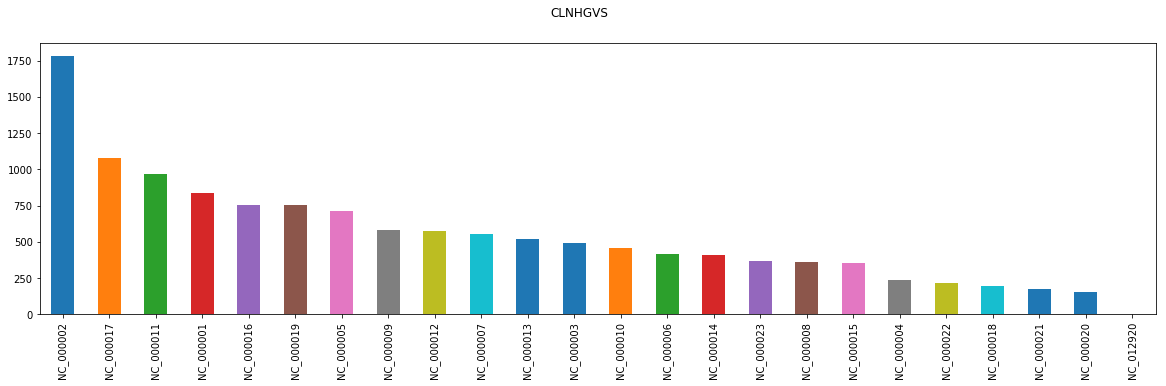

Col: CLNSIGINCL
(categoric)


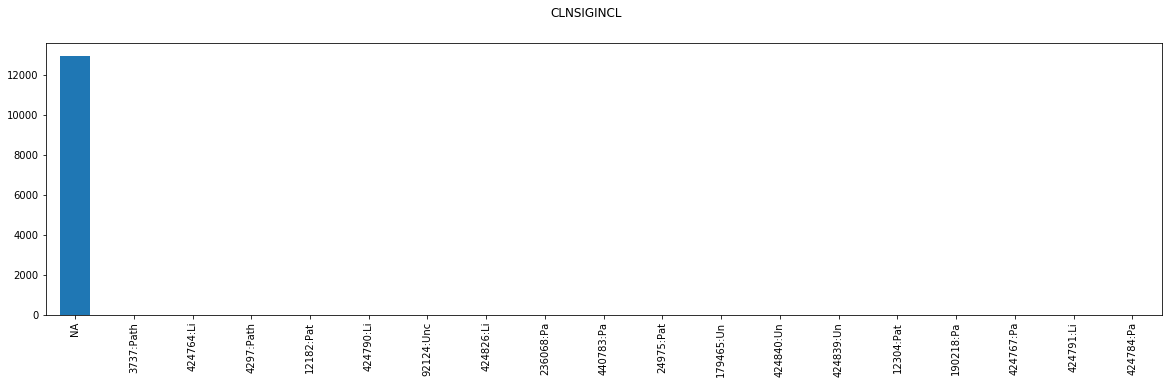

Col: CLNVC
(categoric)


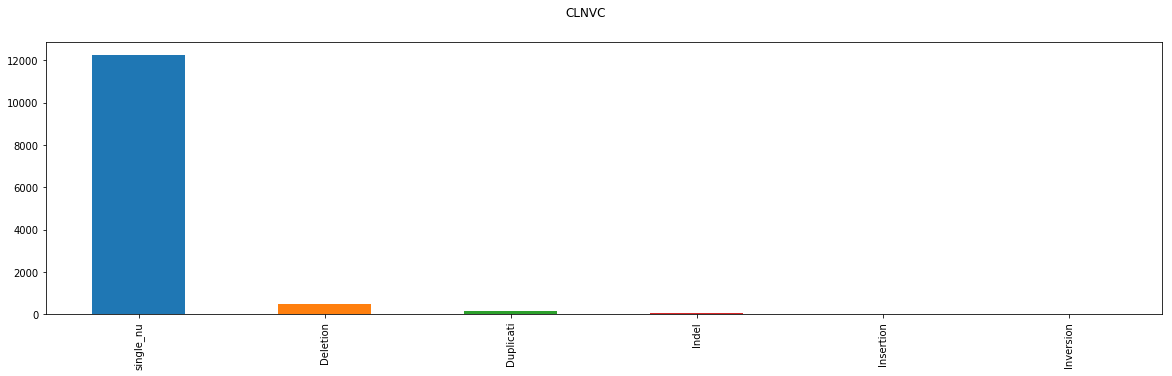

Col: CLNVI
(categoric)


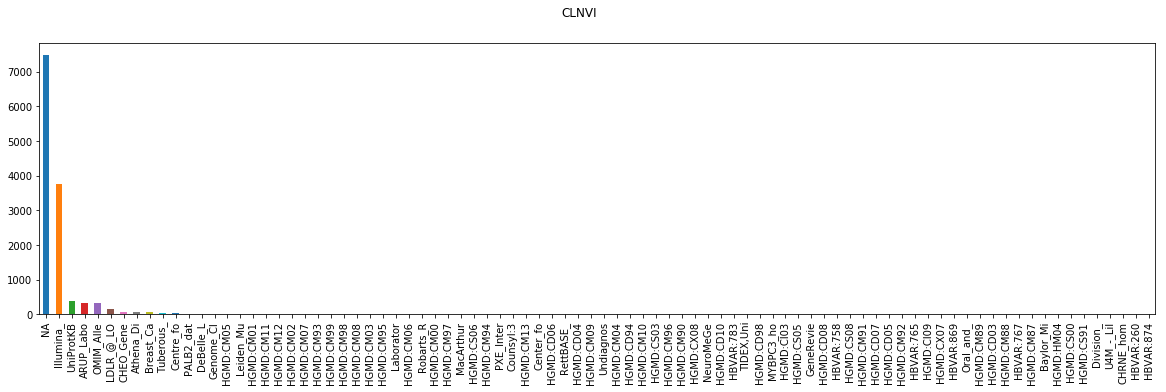

Col: MC
(categoric)


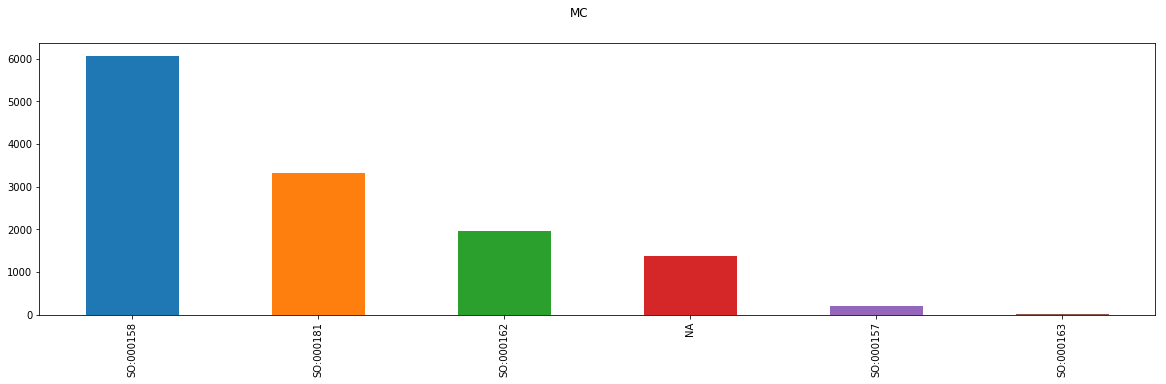

Col: ORIGIN
(numeric)


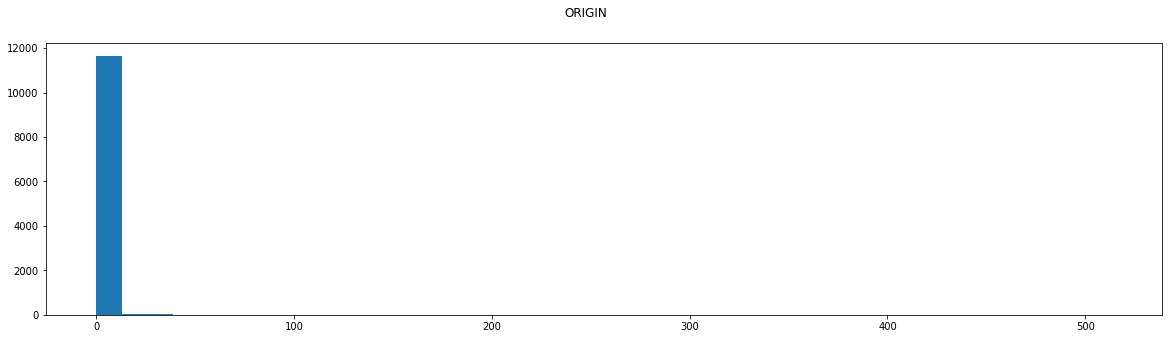

Col: SSR
(numeric)


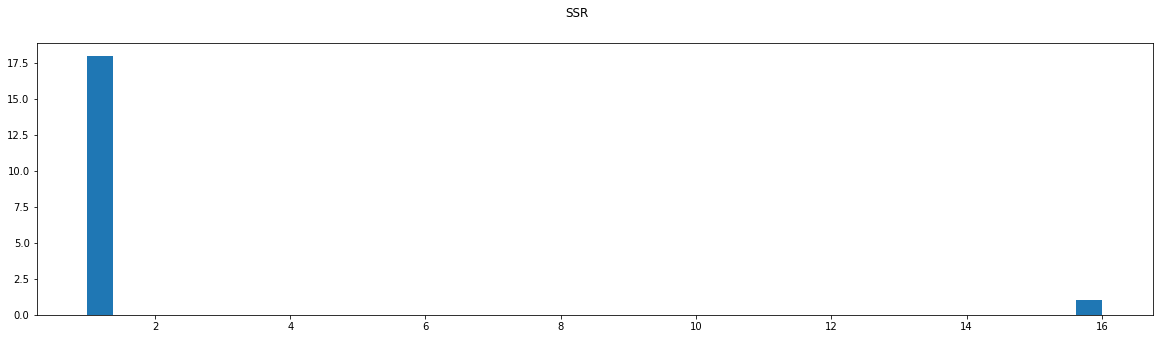

Col: CLASS
(numeric)


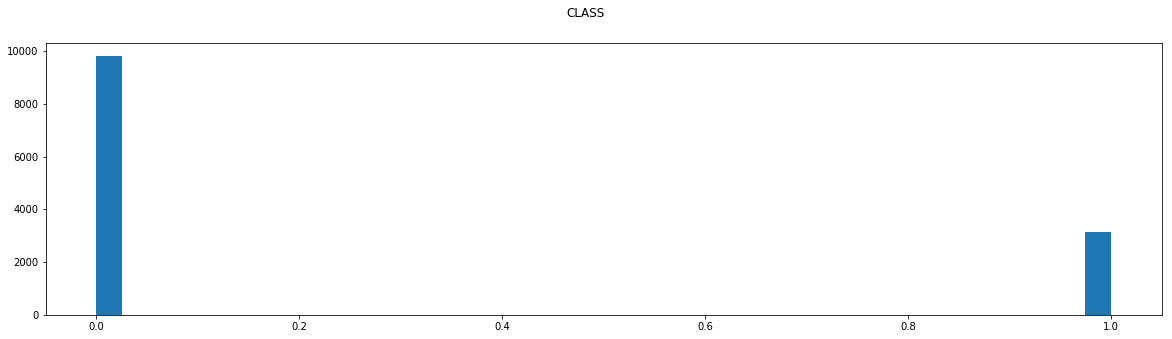

Col: Allele
(categoric)


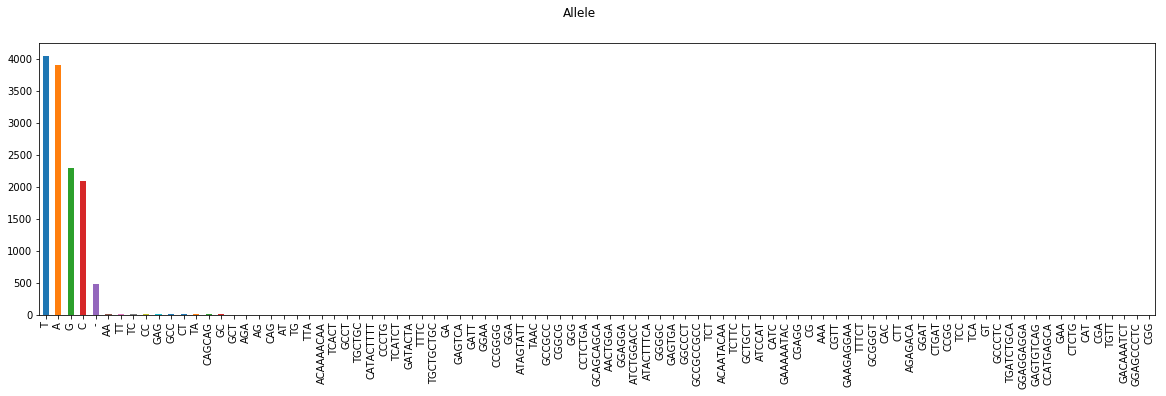

Col: Consequence
(categoric)


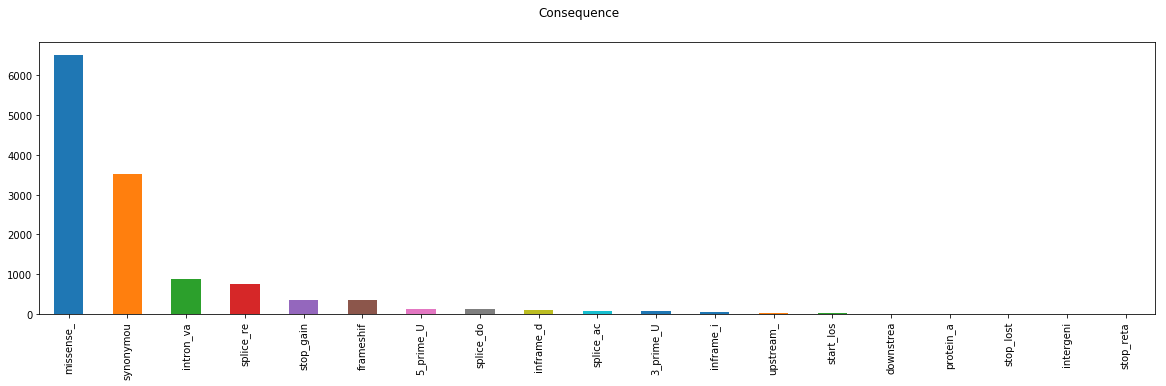

Col: IMPACT
(categoric)


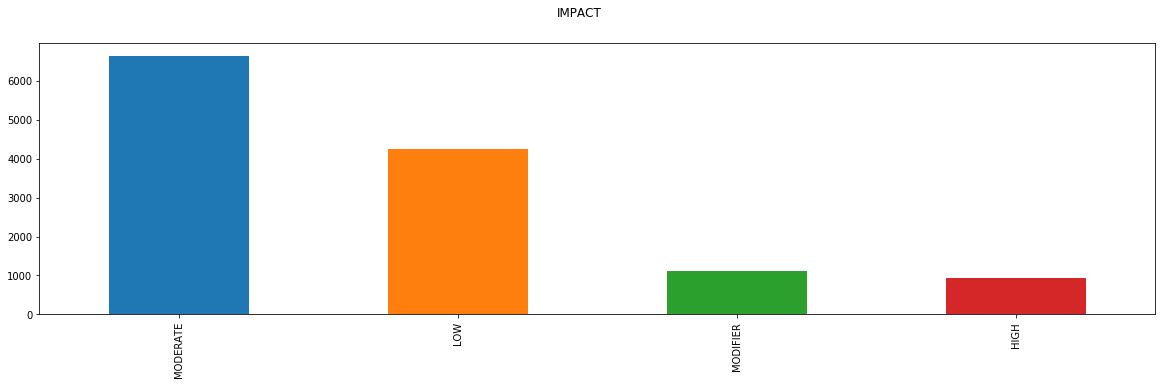

Col: SYMBOL
(categoric)


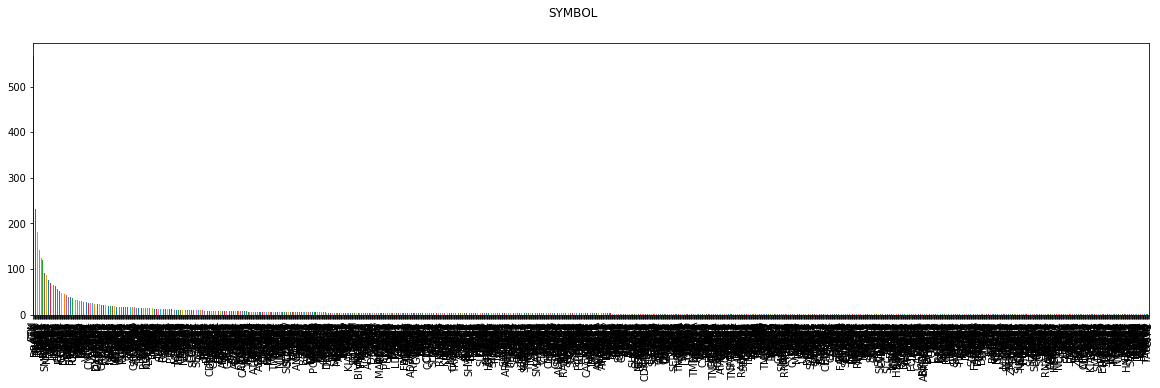

Col: Feature_type
(categoric)


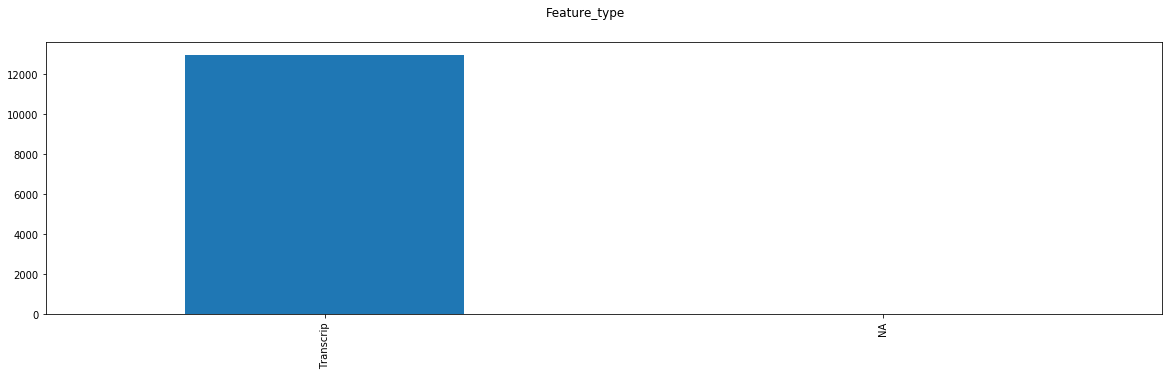

Col: Feature
(categoric)


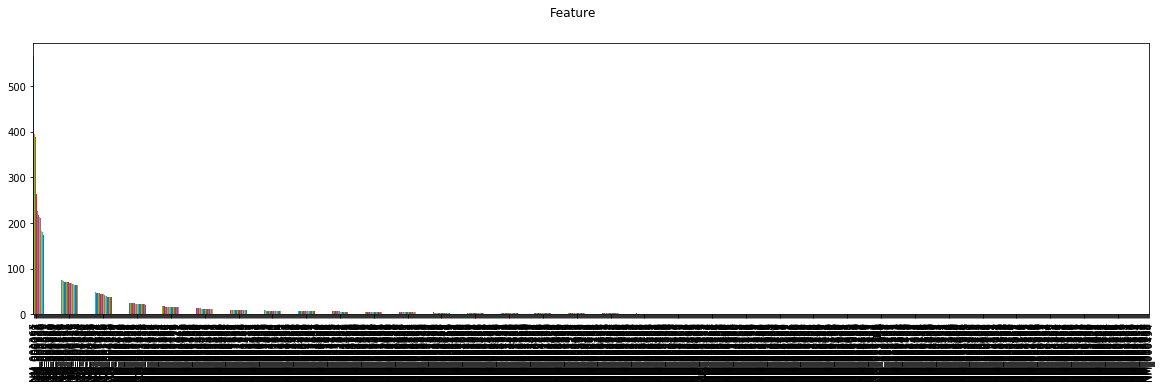

Col: BIOTYPE
(categoric)


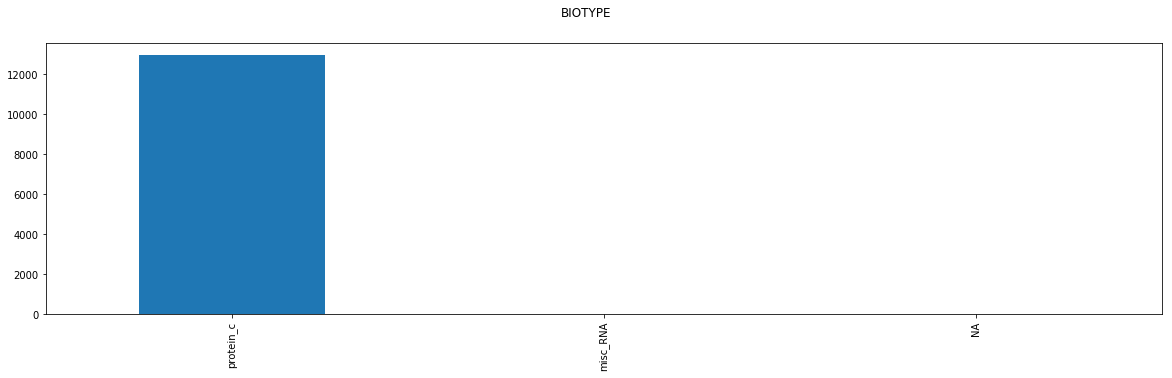

Col: EXON
(categoric)


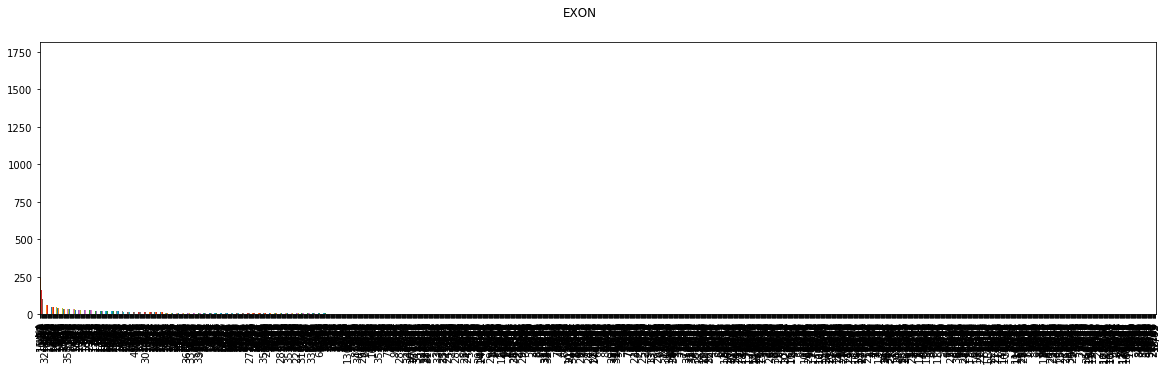

Col: INTRON
(categoric)


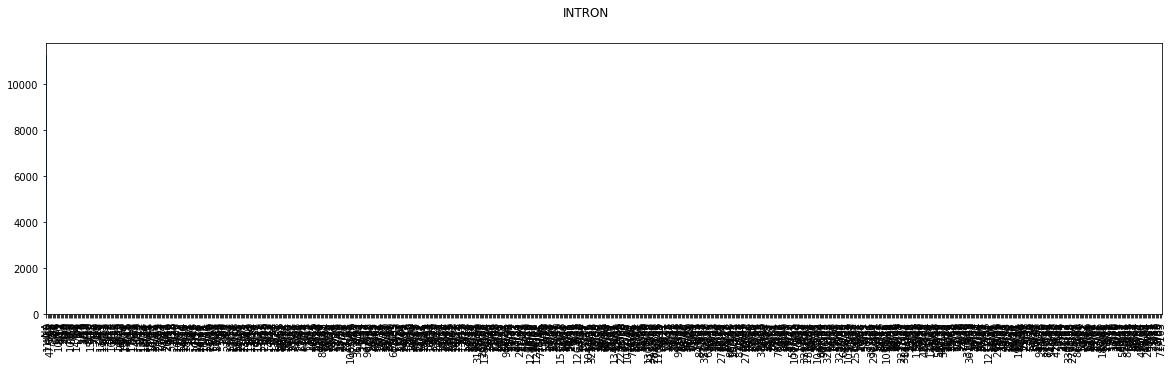

Col: cDNA_position
(categoric)


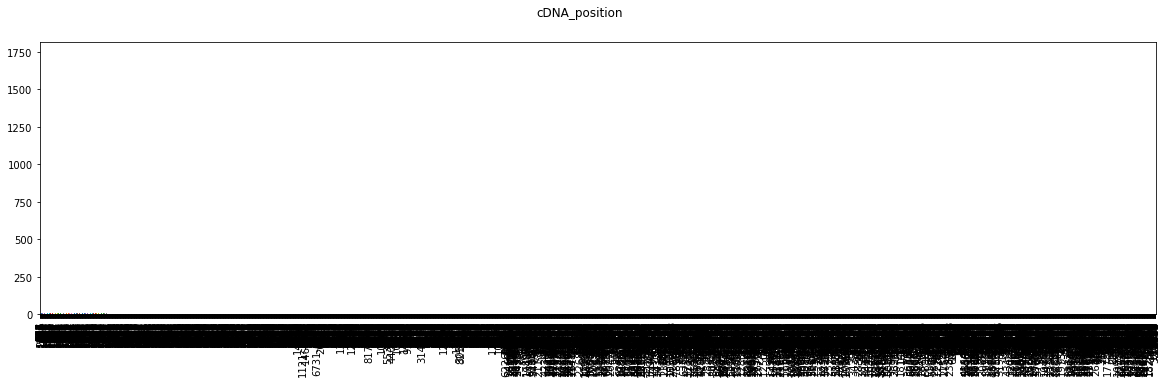

Col: CDS_position
(categoric)


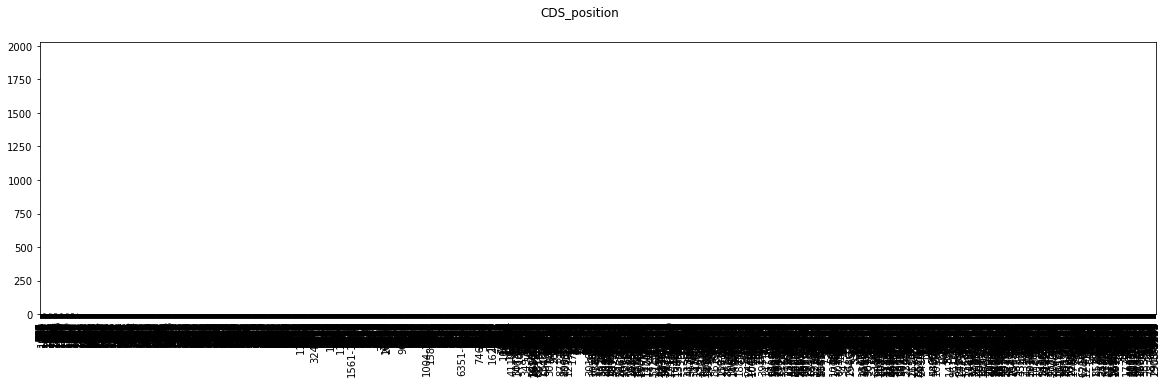

Col: Protein_position
(categoric)


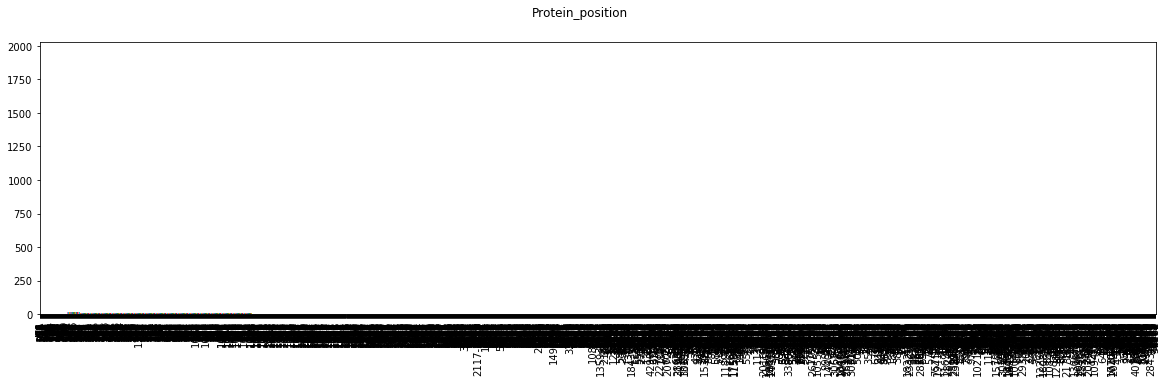

Col: Amino_acids
(categoric)


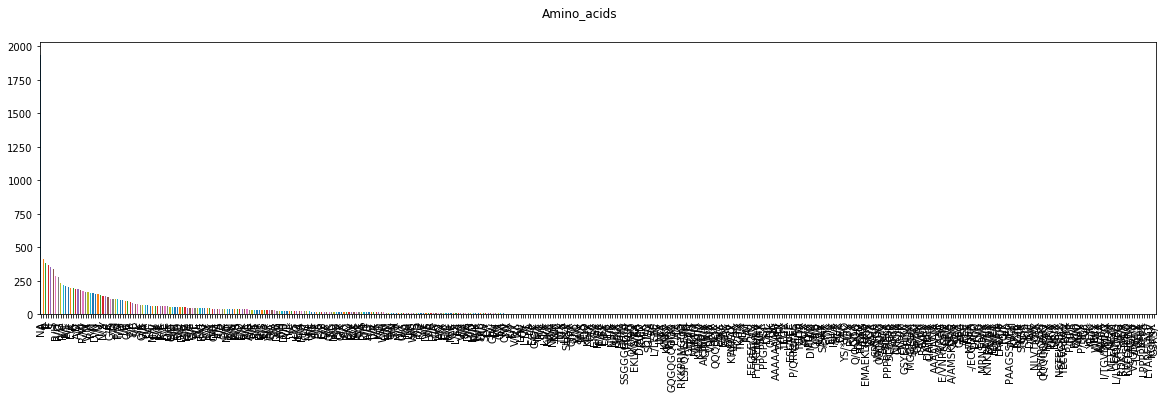

Col: Codons
(categoric)


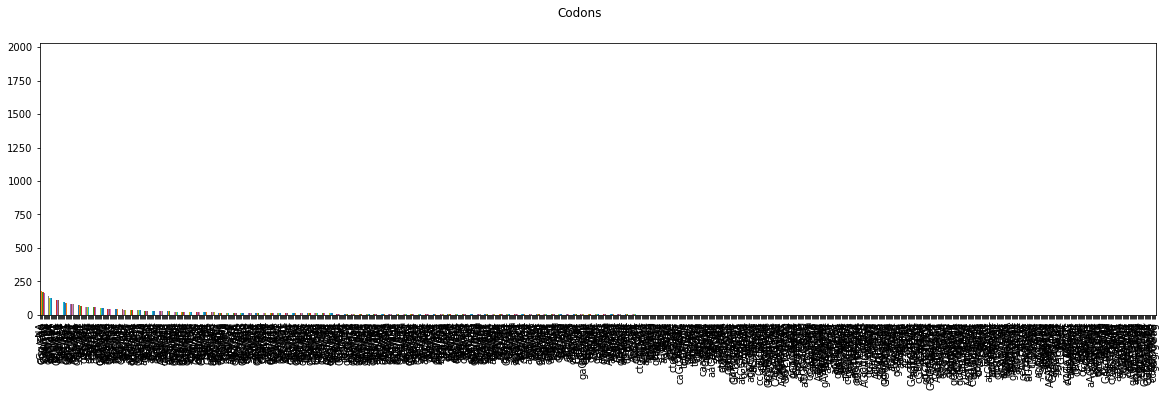

Col: DISTANCE
(numeric)


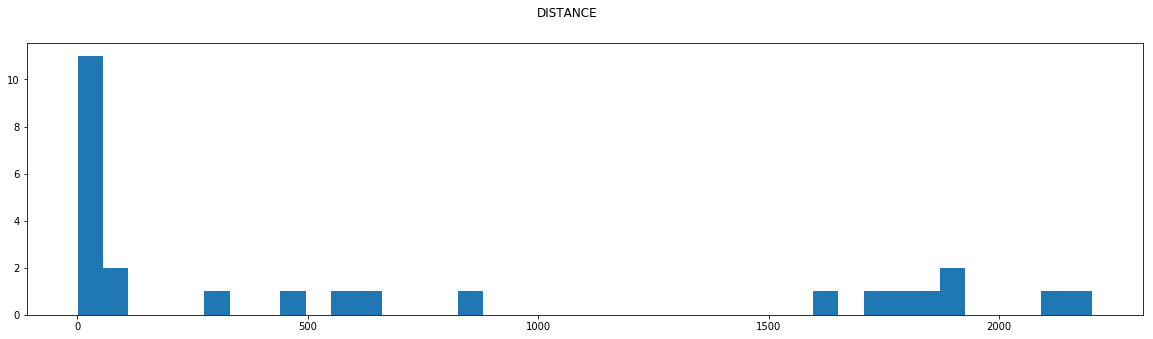

Col: STRAND
(numeric)


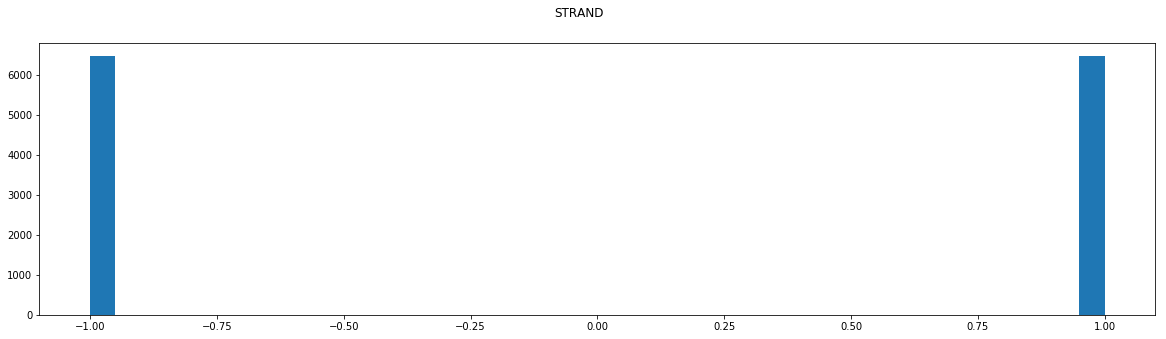

Col: BAM_EDIT
(categoric)


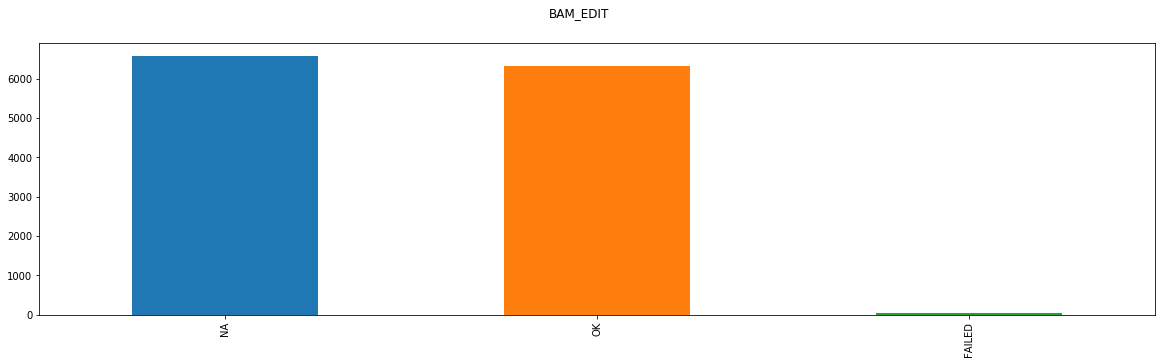

Col: SIFT
(categoric)


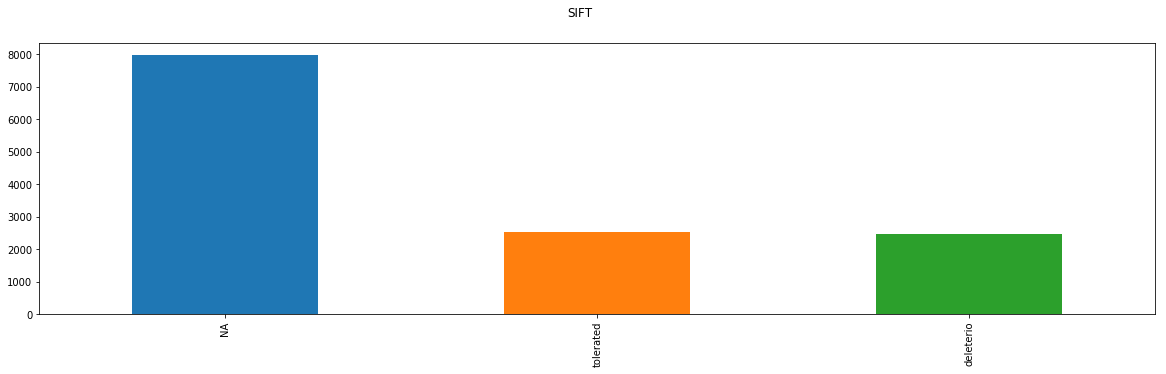

Col: PolyPhen
(categoric)


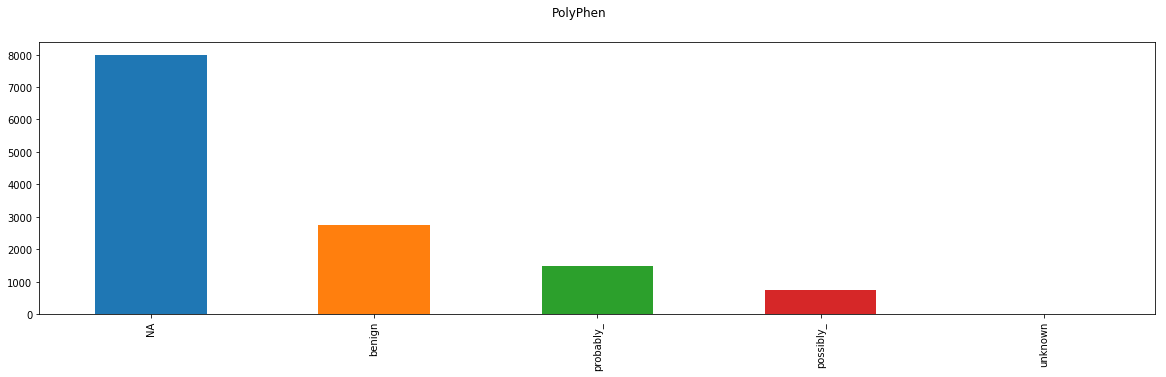

Col: MOTIF_NAME
(categoric)


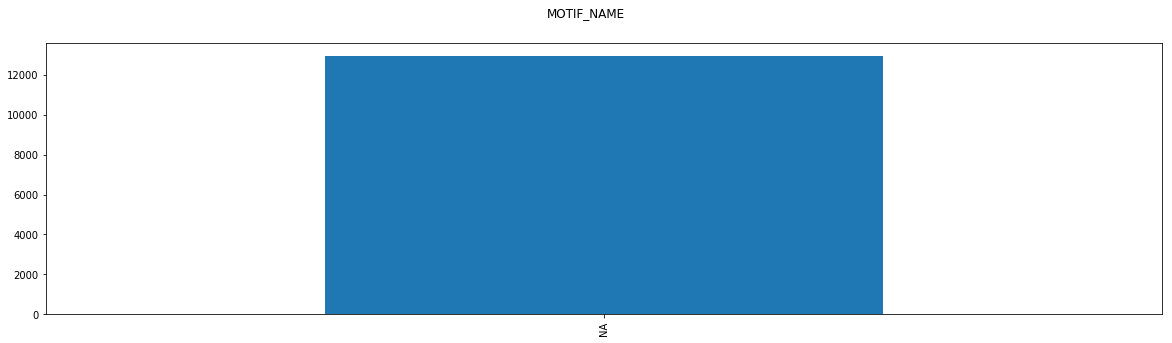

Col: MOTIF_POS
(categoric)


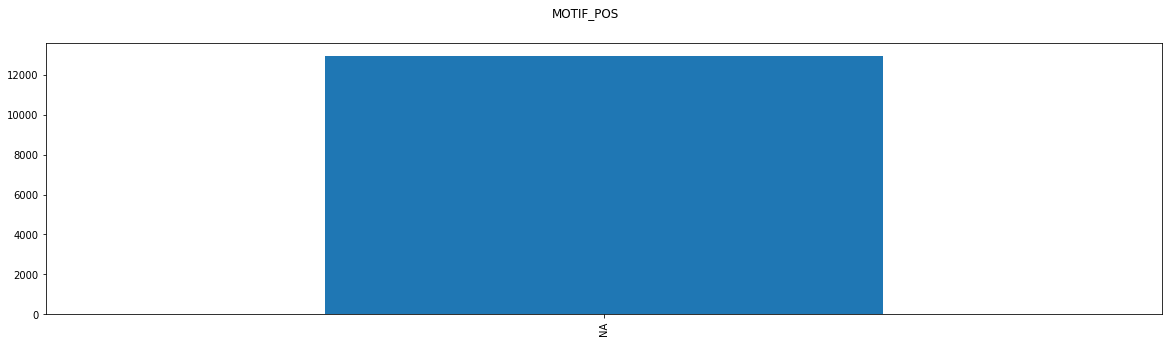

Col: HIGH_INF_POS
(categoric)


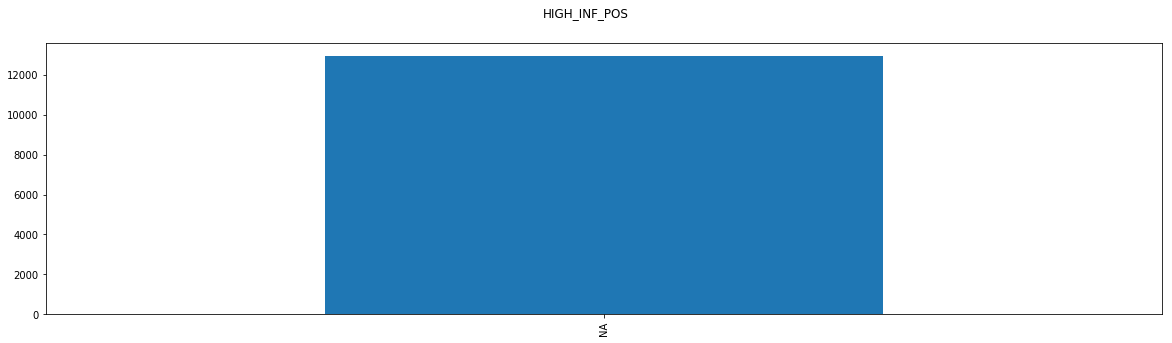

Col: MOTIF_SCORE_CHANGE
(categoric)


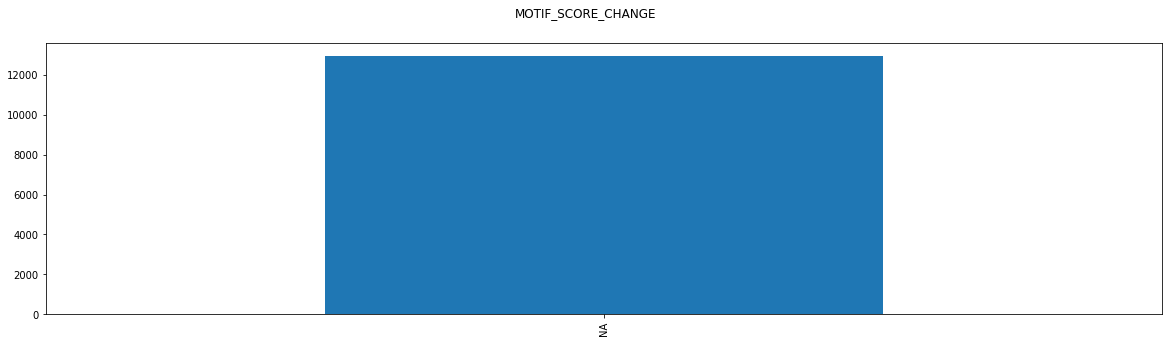

Col: LoFtool
(numeric)


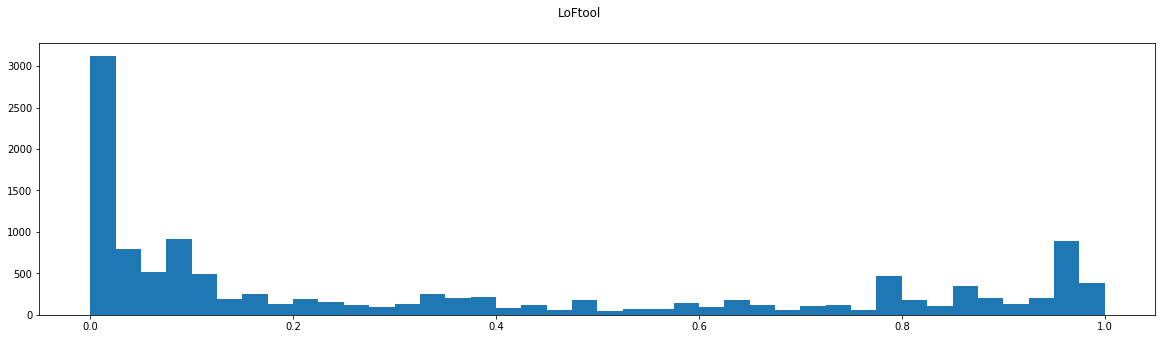

Col: CADD_PHRED
(numeric)


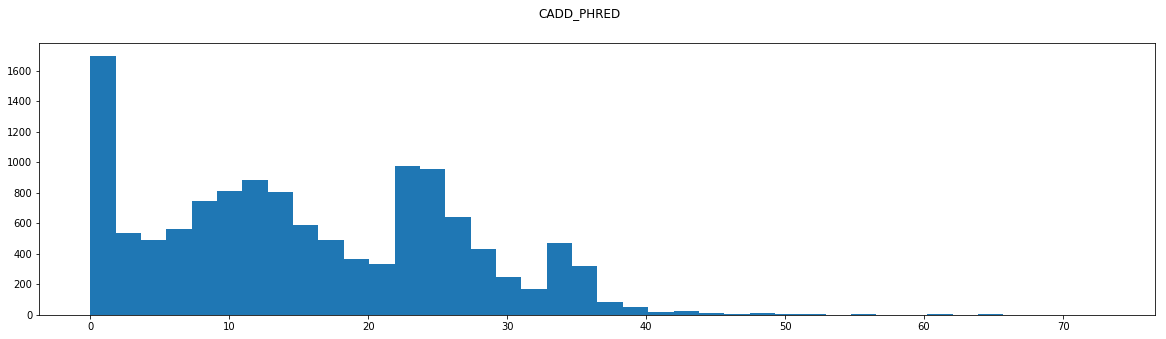

Col: CADD_RAW
(numeric)


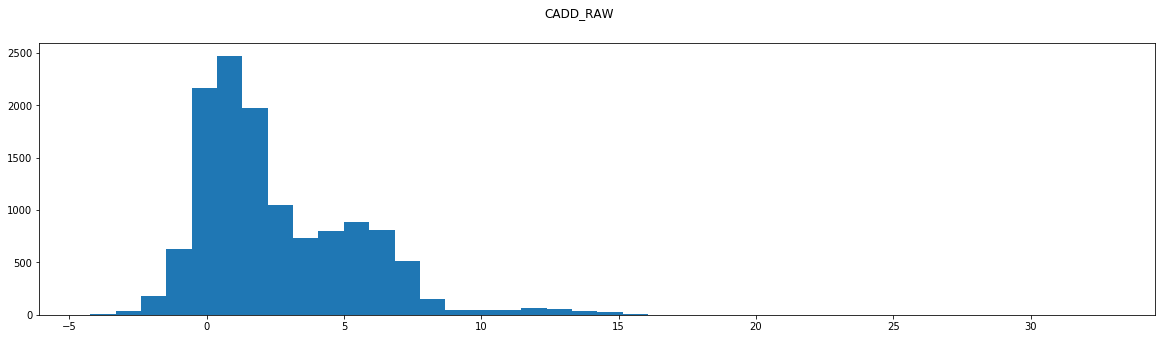

Col: BLOSUM62
(numeric)


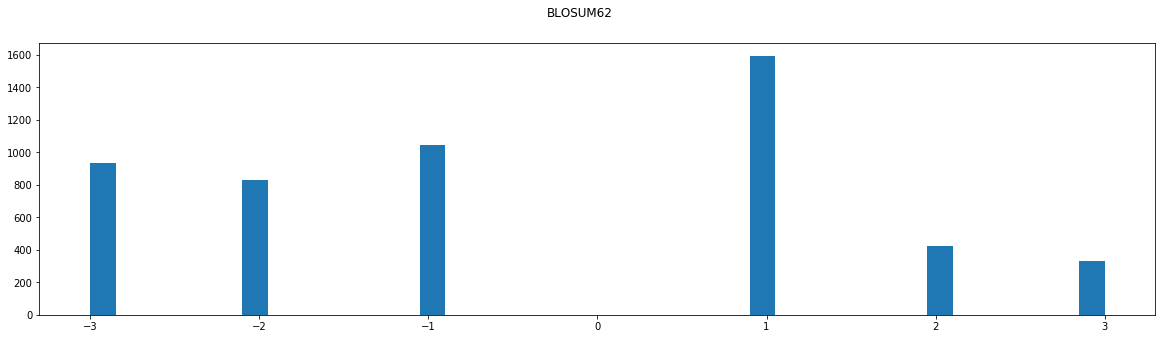

In [9]:
cols = dataMain.dataset.columns[0:46]
dataMain.plot_hist_list(cols)


# Statistics

## Generic Measures

In [10]:
cols = dataMain.dataset.columns[0:46]
dataMain.stats.select(['summary']+cols[1:8]).show()
dataMain.stats.select(['summary']+cols[8:15]).show()
dataMain.stats.select(['summary']+cols[15:24]).show()
dataMain.stats.select(['summary']+cols[24:33]).show()
dataMain.stats.select(['summary']+cols[33:42]).show()
dataMain.stats.select(['summary']+cols[42:46]).show()

+-------+-------------------+-----+-----+--------------------+--------------------+--------------------+--------------------+
|summary|                POS|  REF|  ALT|              AF_ESP|             AF_EXAC|              AF_TGP|            CLNDISDB|
+-------+-------------------+-----+-----+--------------------+--------------------+--------------------+--------------------+
|  count|              12953|12953|12953|               12953|               12953|               12953|               12953|
|   mean|7.775388952690497E7| null| null|0.014185370184513432|0.014313780591368896|0.014690982783911156|                null|
| stddev| 5.97031063420217E7| null| null| 0.05673968232338176| 0.05924080225359468|0.057686004791143566|                null|
|    min|              15923|    A|    A|                 0.0|                 0.0|                 0.0|.|.|.|MedGen:C001...|
|    max|          247587795| TTTG| TTTC|              0.4973|             0.49989|              0.4966|     MedGen:CN

## Specific Measures for Certain Columns

In [11]:
dataMain.col_summary("LoFtool").show()

+---------+-------------------+
|  summary|            LoFtool|
+---------+-------------------+
|    count|              12158|
|     mean|0.34842589503208216|
|   stddev|  0.363758233465041|
|      min|            6.89E-5|
|      max|                1.0|
|+skewness| 0.6329876425374117|
|+kurtosis|  -1.23825660542754|
|  +unique|               1003|
+---------+-------------------+



In [12]:
dataMain.col_summary("CADD_PHRED").show()

+---------+-------------------+
|  summary|         CADD_PHRED|
+---------+-------------------+
|    count|              12756|
|     mean| 15.710945829413564|
|   stddev| 10.886925799248173|
|      min|              0.001|
|      max|               73.0|
|+skewness| 0.3480400757861891|
|+kurtosis|-0.5033197980043314|
|  +unique|               4189|
+---------+-------------------+



In [13]:
dataMain.col_summary("CADD_RAW").show()

+---------+------------------+
|  summary|          CADD_RAW|
+---------+------------------+
|    count|             12756|
|     mean|2.5649561559266187|
|   stddev|2.9596957583702124|
|      min|         -4.239372|
|      max|         32.693999|
|+skewness|1.5218183954951214|
|+kurtosis| 4.595262300205462|
|  +unique|             12967|
+---------+------------------+



## Correlation

In [14]:
dataMain.plot_corr(cols, mode="TABLE").style.background_gradient().set_precision(2)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,DISTANCE,STRAND,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
POS,1,0.011,0.012,0.011,0.0029,-0.27,-0.0051,-0.01,-0.13,nan,nan,0.27,0.00088,-0.0052,0.032
AF_ESP,0.011,1,0.86,0.8,-0.011,-0.2,-0.13,0.84,-0.018,nan,nan,0.038,-0.17,-0.15,0.045
AF_EXAC,0.012,0.86,1,0.8,-0.011,0.3,-0.12,0.84,-0.013,nan,nan,0.042,-0.16,-0.14,0.044
AF_TGP,0.011,0.8,0.8,1,-0.011,-0.29,-0.13,-0.23,-0.014,nan,nan,0.04,-0.17,-0.15,0.043
ORIGIN,0.0029,-0.011,-0.011,-0.011,1,nan,0.016,nan,-0.004,nan,nan,-0.026,0.053,0.055,0.0032
SSR,-0.27,-0.2,0.3,-0.29,nan,1,-0.21,nan,0.34,nan,nan,0.35,0.074,0.051,nan
CLASS,-0.0051,-0.13,-0.12,-0.13,0.016,-0.21,1,0.028,-0.032,nan,nan,0.0025,-0.026,-0.042,-0.02
DISTANCE,-0.01,0.84,0.84,-0.23,nan,nan,0.028,1,0.16,nan,nan,-0.083,0.056,0.099,nan
STRAND,-0.13,-0.018,-0.013,-0.014,-0.004,0.34,-0.032,0.16,1,nan,nan,-0.17,0.015,0.011,0.014
MOTIF_POS,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,DISTANCE,STRAND,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
POS,1.000000,0.010624,0.011623,0.011331,0.002893,-0.269702,-0.005073,-0.010069,-0.131563,NaN,NaN,0.273006,0.000881,-0.005225,0.032110
AF_ESP,0.010624,1.000000,0.855386,0.801203,-0.010923,-0.203564,-0.127270,0.839793,-0.018159,NaN,NaN,0.038475,-0.169163,-0.151284,0.044574
AF_EXAC,0.011623,0.855386,1.000000,0.801358,-0.010678,0.302228,-0.120251,0.839609,-0.012713,NaN,NaN,0.041793,-0.160169,-0.144284,0.044448
AF_TGP,0.011331,0.801203,0.801358,1.000000,-0.011268,-0.289458,-0.129527,-0.225170,-0.013520,NaN,NaN,0.040237,-0.169589,-0.152387,0.043037
ORIGIN,0.002893,-0.010923,-0.010678,-0.011268,1.000000,NaN,0.015607,NaN,-0.003996,NaN,NaN,-0.025759,0.052972,0.054983,0.003249
SSR,-0.269702,-0.203564,0.302228,-0.289458,NaN,1.000000,-0.210042,NaN,0.336123,NaN,NaN,0.352198,0.074150,0.051419,NaN
CLASS,-0.005073,-0.127270,-0.120251,-0.129527,0.015607,-0.210042,1.000000,0.028466,-0.031781,NaN,NaN,0.002513,-0.025933,-0.042166,-0.019594
DISTANCE,-0.010069,0.839793,0.839609,-0.225170,NaN,NaN,0.028466,1.000000,0.156202,NaN,NaN,-0.083372,0.055510,0.099172,NaN
STRAND,-0.131563,-0.018159,-0.012713,-0.013520,-0.003996,0.336123,-0.031781,0.156202,1.000000,NaN,NaN,-0.169764,0.014544,0.011341,0.014166
MOTIF_POS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


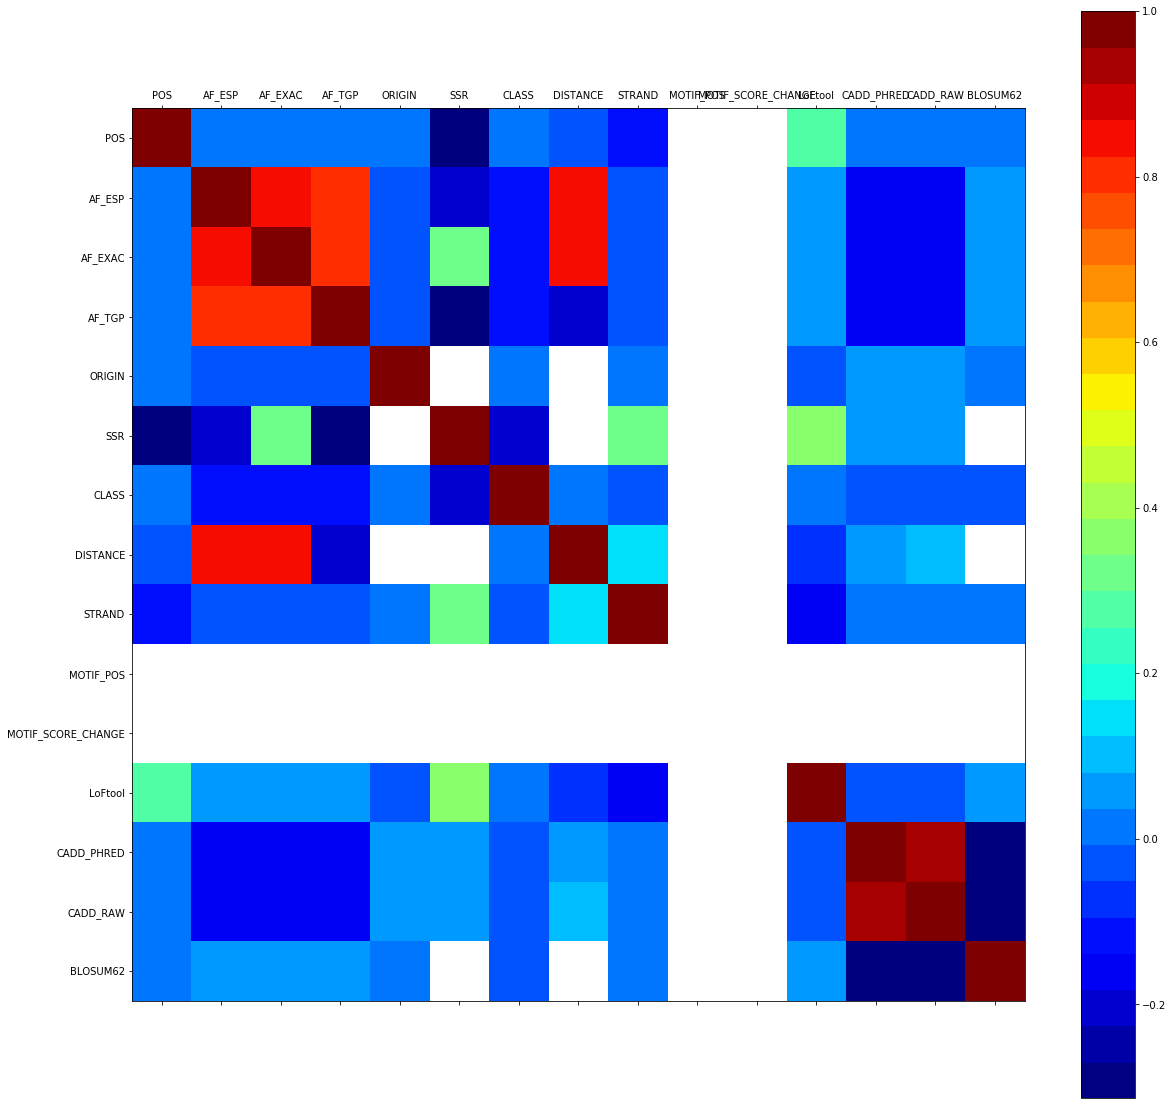

In [15]:
cols = dataMain.dataset.columns[0:46]
dataMain.plot_corr(cols, mode="HEATMAP", size=20)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.097, right=-0.097
  'left=%s, right=%s') % (left, right))
/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/axes/_base.py:323

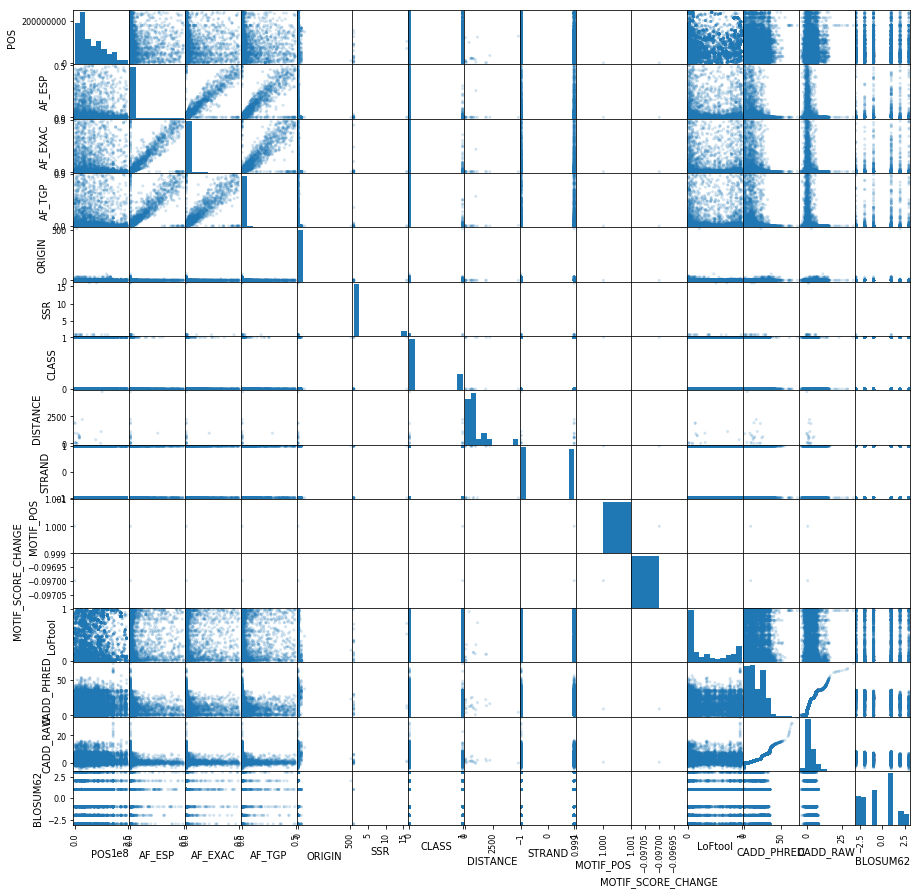

In [27]:
cols = dataMain.dataset.columns[0:46]
dataMain.simple_scatterplot(cols, size=15)

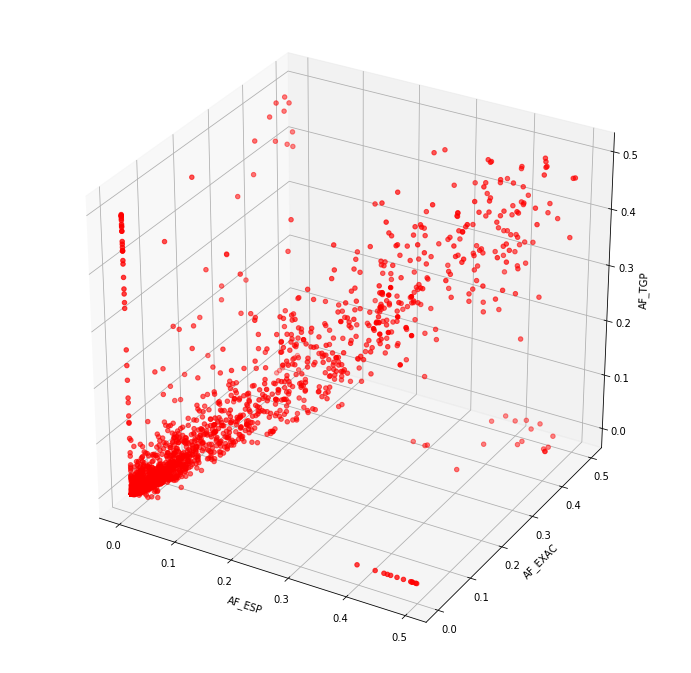

In [29]:
dataMain.plot_simple_3d_scatterplot(col_x="AF_ESP", col_y="AF_EXAC", col_z="AF_TGP", size=12)


# Missing Values

### As shown in Generic Mesasures, several attributes occur less than dataframe count:

No values (fields to be discarded) for:
MOTIF_NAME
MOTIF_POS
HIGH_INF_POS
MOTIF_SCORE_CHANGE

Most of the values (>95%) are missing for:
CLNDNINCL
CLNSIGINCL
SSR
DISTANCE
  
Many missing values (>50%) for:
CLNVI
INTRON
SIFT
PolyPhen
BAM_EDIT
BLOSUM62

Some missing values (<20%) for:
ORIGIN
EXON
cDNA_position
CDS_position
Protein_position
Amino_acids
Codons
 
Almost no missing values (<5%) for:
SYMBOL
Feature_type
BIOTYPE
CADD_PHRED
CADD_RAW
STRAND


# Unique Values

Several attributes have values concentrated around a few ones. This could be seen intuitively in the previous attributes histogram. 

- CHROM
- CLNDISDB
- CLNVC
- CLNVI
- MC
- ORIGIN
- CLASS
- ALT
- Allele 
    - Most of the value instances are T,A,G,C
- Consequence
- IMPACT
- PolyPhen
- Feature_type
    - only 1 value
- BIOTYPE
    - Mostly 1 value (protein_c)
- DISTANCE    
- BAM_EDIT
    - 2 values: OK / FAILED, or NA
- SIFT
    - 2 values: tolerated / deleterious, or NA
- PolyPhen
- BLOSUM62

In the following tables, we rank the most repeated values.


In [31]:
for attr in ["CHROM","CLNDISDB","CLNVC","CLNVI","MC","ORIGIN","CLASS","ALT","Allele","Consequence","IMPACT","PolyPhen","BLOSUM62"]:
    dataMain.uniques_count(attr, top=19).show()


+------+------------+
| CHROM|count_values|
+------+------------+
|     2|        1818|
|    17|        1101|
|    11|         978|
|     1|         837|
|    19|         783|
|    16|         774|
|     5|         753|
|     7|         620|
|     9|         567|
|    12|         557|
|    13|         550|
|     3|         500|
|    10|         474|
|    14|         418|
|     6|         407|
|     X|         390|
|     8|         386|
|    15|         361|
|     4|         257|
|others|         689|
+------+------------+

+--------------------+------------+
|            CLNDISDB|count_values|
+--------------------+------------+
|     MedGen:CN169374|        1121|
|MedGen:C0027672,S...|         348|
|MedGen:CN169374|M...|         273|
|MedGen:C0027672,S...|         225|
|MedGen:C1837342,O...|         202|
|MedGen:C0020445,O...|         151|
|MedGen:C0027672,S...|         108|
|Human_Phenotype_O...|         107|
|MedGen:C0004135,O...|         106|
|MedGen:C0027672,S...|          98|
|Me

# Class (Im)balance
- Check target column PolyPhen for imbalance, and use undersampling to balance

In [33]:
# Check that data is clearly unbalanced by PolyPhen
dataToBalance = DataSet(spark_context=sc, filename="clinvar_conflicting.csv", sampling_mode="ALL")

dataToBalance.dataset.groupBy("PolyPhen").count().show()


loading COS csv
+-----------------+-----+
|         PolyPhen|count|
+-----------------+-----+
|          unknown|    4|
|             null|40392|
|           benign|13329|
|possibly_damaging| 3932|
|probably_damaging| 7531|
+-----------------+-----+



In [35]:
# Explore relationship between highly correlated frequencies
#dataMain.simple_scatter_labels("AF_ESP", "AF_EXAC", "PolyPhen", top=5, size_x=15, size_y=10)

dataToBalance2 = DataSet(spark_context=sc, filename="dummy", from_dataframe=dataToBalance.dataset.filter("PolyPhen is not null and PolyPhen!='unknown'"))

occurs = dataToBalance2.dataset.groupBy("PolyPhen").count().alias("cnt")


In [37]:
occurs.show()

+-----------------+-----+
|         PolyPhen|count|
+-----------------+-----+
|           benign|13329|
|possibly_damaging| 3932|
|probably_damaging| 7531|
+-----------------+-----+



In [39]:
less_occurs = occurs.sort("count").head()[1]
total_occurs = dataToBalance2.dataset.count()

In [41]:
dataBalanced = DataSet(spark_context=sc, filename="", from_dataframe = \
                dataToBalance2.dataset.filter("PolyPhen='benign'").limit(less_occurs). \
                union(dataToBalance2.dataset.filter("PolyPhen='possibly_damaging'").limit(less_occurs)) .\
                union(dataToBalance2.dataset.filter("PolyPhen='probably_damaging'").limit(less_occurs)) )

dataBalanced.dataset.groupBy("PolyPhen").count().show()

+-----------------+-----+
|         PolyPhen|count|
+-----------------+-----+
|           benign| 3932|
|possibly_damaging| 3932|
|probably_damaging| 3932|
+-----------------+-----+



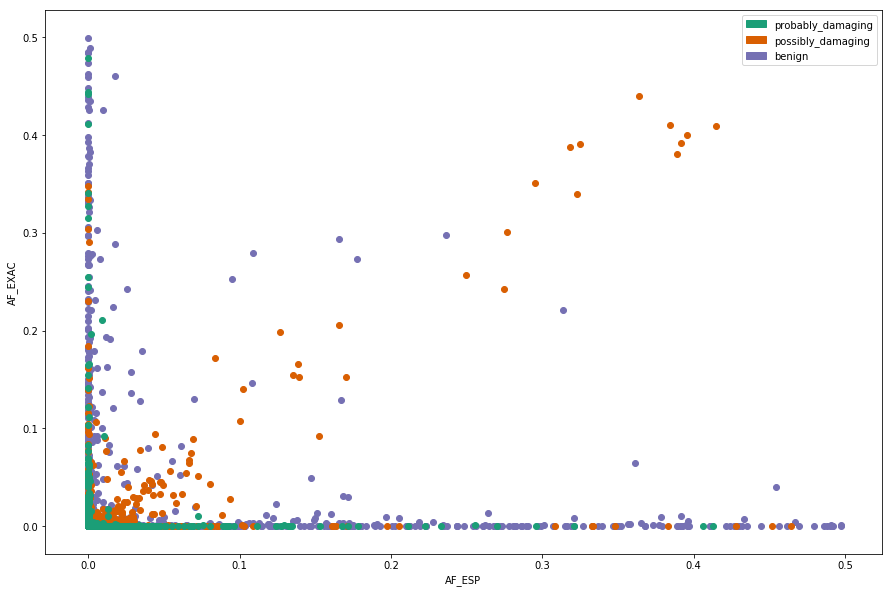

In [43]:
dataBalanced.simple_scatter_labels("AF_ESP", "AF_EXAC", "PolyPhen", top=5, size_x=15, size_y=10)

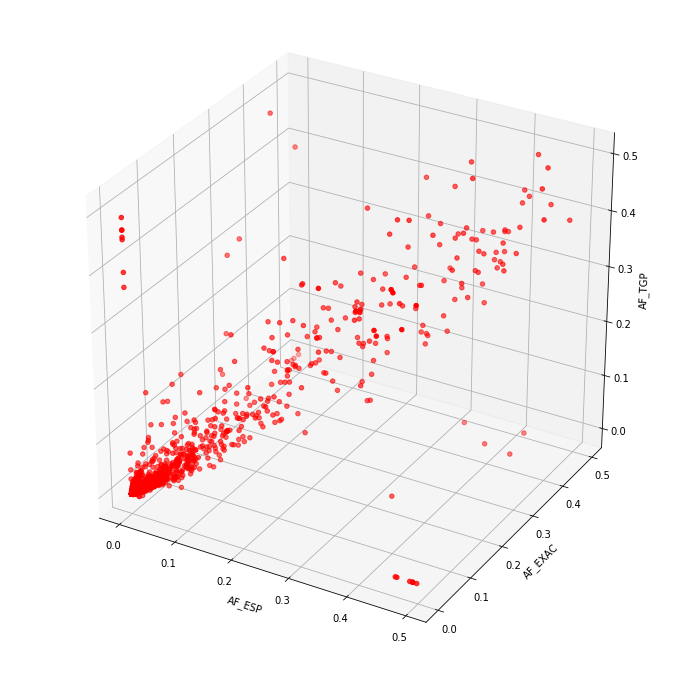

In [45]:
dataBalanced.plot_simple_3d_scatterplot(col_x="AF_ESP", col_y="AF_EXAC", col_z="AF_TGP", size=12)


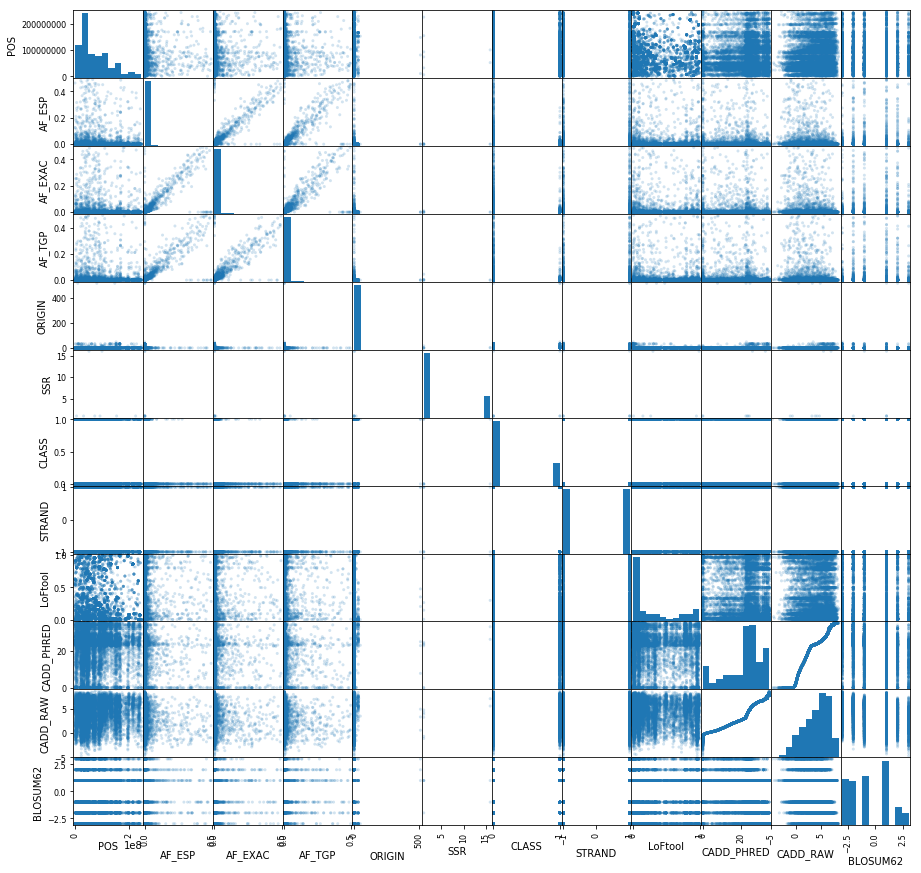

In [47]:
dataBalanced.simple_scatterplot(dataBalanced.dataset.columns, size=15)

# Dimensionality Reduction
- For exploring outliers

In [48]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

cols = ["POS","AF_ESP","AF_EXAC","AF_TGP","ORIGIN","SSR","CLASS","STRAND", "LoFtool", "CADD_PHRED", "CADD_RAW", "BLOSUM62"]

result = dataBalanced.dataset.select(cols).na.fill(0)

assembler = VectorAssembler(inputCols=cols, outputCol="features")

features = assembler.transform(result)


In [49]:
values = list(map(lambda r : r.features, features))
    
#features.rdd.map(lambda r : r.features).take(10)

In [50]:
pca = PCA(k=3, inputCol='features', outputCol='pcaFeatures')
model = pca.fit(features)

In [51]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.limit(5).toPandas()

,pcaFeatures
0,"[-33136324.0, 8.77723286144, 21.2042404611]"
1,"[-33137845.0, 14.8484204053, 6.37968461176]"
2,"[-33139548.0, 23.7109216487, 9.49124071776]"
3,"[-33143391.0, 23.6078708269, 9.45552700468]"
4,"[-33144064.0, 25.7209217464, 10.1919338834]"


In [52]:
result_pca.printSchema()

root
 |-- pcaFeatures: vector (nullable = true)



In [53]:
samp = result_pca.sample(False, 0.5)
x = list(map(lambda b : b[0], list(map(lambda a : a.pcaFeatures, samp.collect()))  ) )
y = list(map(lambda b : b[1], list(map(lambda a : a.pcaFeatures, samp.collect()))  ) )
z = list(map(lambda b : b[2], list(map(lambda a : a.pcaFeatures, samp.collect()))  ) )

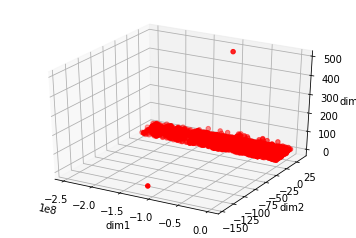

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, c='r', marker='o')
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.set_zlabel('dim3')

plt.show()


In [55]:
sum(model.explainedVariance)


0.99999999999999811

In [56]:
model.pc

DenseMatrix(12, 3, [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, ..., 0.9436, 0.0002, -0.0013, 0.0169, 0.0033, 0.3142, 0.1001, -0.0226], 0)

In [57]:
dir(model)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_call_java',
 '_clear',
 '_copyValues',
 '_copy_params',
 '_create_from_java_class',
 '_defaultParamMap',
 '_dummy',
 '_empty_java_param_map',
 '_from_java',
 '_java_obj',
 '_make_java_param_pair',
 '_new_java_obj',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_to_java',
 '_transfer_param_map_from_java',
 '_transfer_param_map_to_java',
 '_transfer_params_from_java',
 '_transfer_params_to_java',
 '_transform',
 'copy',
 'explainParam',
 'explainParams',
 'explainedVariance',
 'extractParamMap',
 'getOrDefault',
 'getParam',
 'hasDefault',
 'hasP